In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def countCircles(img: np.array):
    # convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # image smoothing
    blur = cv2.GaussianBlur(gray, (11, 11), 0)
    # apply canny edge detector
    canny = cv2.Canny(blur, 30, 150, 3)
    # apply morphological operation (Dilation) to accentuate edges
    dilated = cv2.dilate(canny, (1, 1), iterations=0)

    # retrieves edges
    (cnt, hierarchy) = cv2.findContours(
        dilated.copy(), 
        cv2.RETR_EXTERNAL, 
        cv2.CHAIN_APPROX_NONE
    )

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    count = 0
    for entry in cnt:
        # approximate contour to polygone
        polygone = cv2.approxPolyDP(entry, .03 * cv2.arcLength(entry, True), True)
        vertex = len(polygone);
        if vertex > 4 and cv2.isContourConvex(polygone):
            cv2.drawContours(rgb, entry, -1, (0, 255, 0), 2)
            count += 1

    fig, axs = plt.subplots(1, 2, figsize = (8,8))
    axs[0].imshow(img)
    axs[0].set_title('Original')
    axs[1].imshow(rgb)
    axs[1].set_title(f'{count} circles detected')
  

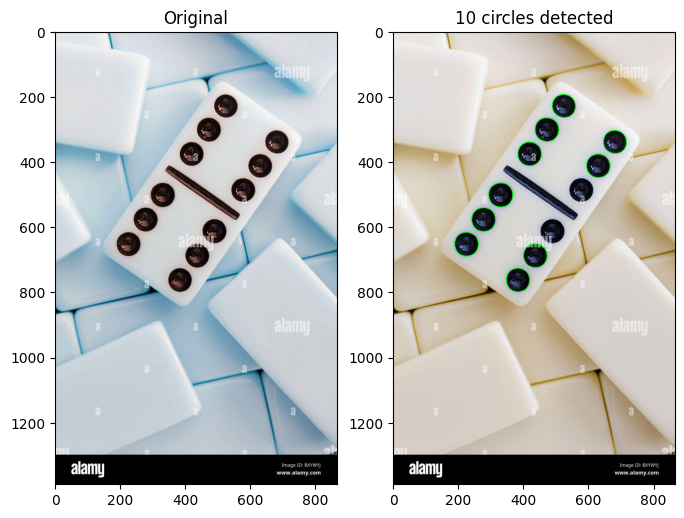

In [ ]:
countCircles(cv2.imread('5.jpeg'))

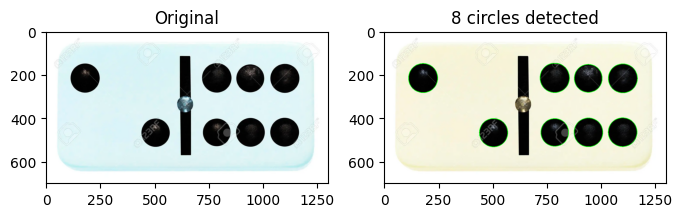

In [ ]:
countCircles(cv2.imread('4.webp'))

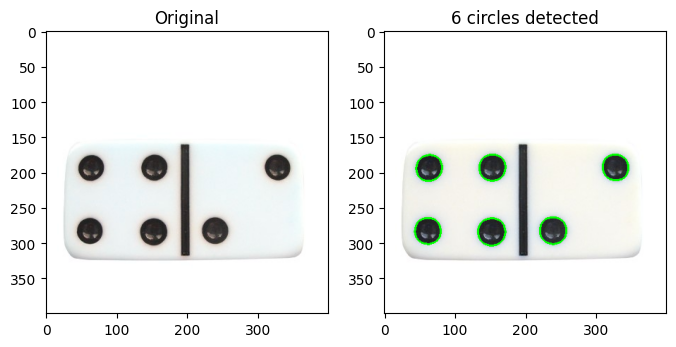

In [ ]:
countCircles(cv2.imread('7.jpeg'))

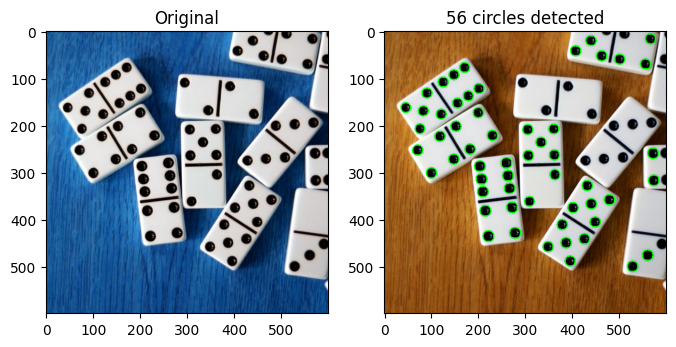

In [ ]:
countCircles(cv2.imread('10.jpeg'))

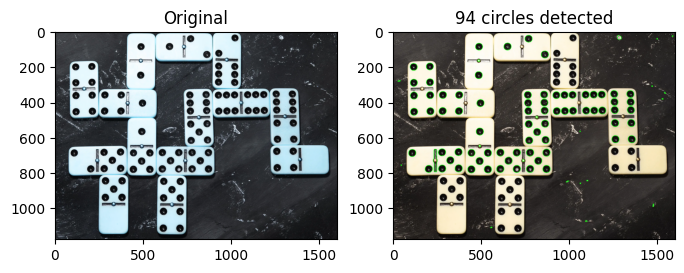

In [ ]:
countCircles(cv2.imread('11.webp'))

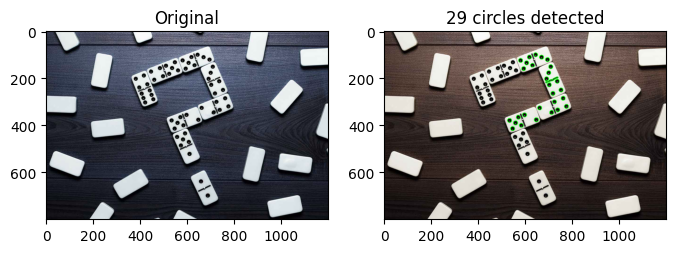

In [ ]:
countCircles(cv2.imread('12.jpeg'))

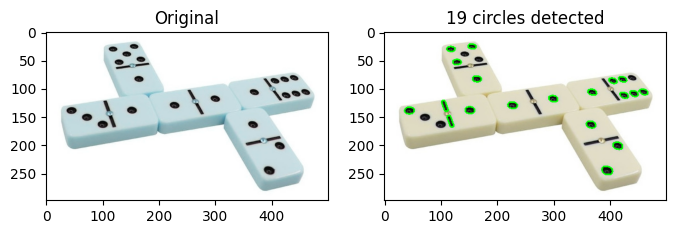

In [ ]:
countCircles(cv2.imread('13.jpeg'))

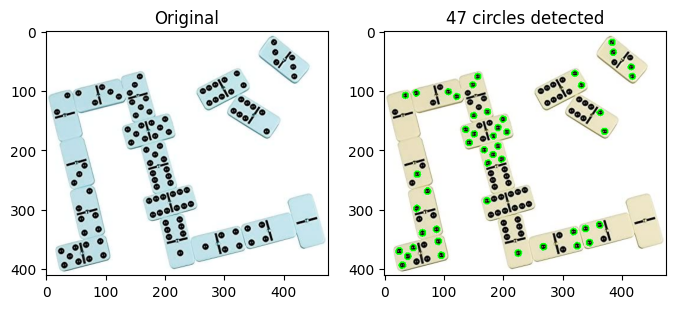

In [ ]:
countCircles(cv2.imread('14.jpg'))